# Assignment: Implementing Gradient Descent and Stochastic Gradient Descent

## Understanding Different Types of Gradient Descent
### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates the model parameters using only one randomly chosen data point per iteration. 

This makes it computationally efficient and allows it to escape local minima, but it can be noisy and less stable compared to other methods. 

The randomness in the updates introduces variance, which can sometimes help in finding a better solution, but may also slow down convergence or cause oscillations.

Mathematically, the update rule for SGD is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_i(\theta) $$
where:
- $\theta$ represents the parameters
- $\alpha$ is the learning rate
- $\nabla J_i(\theta)$ is the gradient computed using a single data point $$ i $$


### Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between batch and stochastic gradient descent. Instead of using the entire dataset or a single data point, it updates the parameters using a small batch of randomly selected data points. This balances stability and efficiency, making it a commonly used approach in deep learning. Mini-batch gradient descent helps smooth out some of the noise of SGD while still being computationally efficient. The batch size is a hyperparameter that affects convergence speed and accuracy.

The update rule for mini-batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) $$
where:
- $m$ is the mini-batch size
- $\sum_{i=1}^{m} \nabla J_i(\theta)$ represents the gradient computed over a batch of $m$ data points

### Batch Gradient Descent (Vanilla)
Batch Gradient Descent computes the gradient using the entire dataset at each iteration. 

While this method leads to a smooth convergence, it is computationally expensive, especially for large datasets. 

It tends to be more stable and can find the optimal solution efficiently, but it may take longer compared to SGD and Mini-Batch Gradient Descent.

The update rule for batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta) $$
where:
- $\nabla J(\theta)$ is the gradient computed over the entire dataset


## Task 1: Implement Gradient Descent for a Quadratic Function
1. Define a quadratic function, e.g., $$ f(x) = x^2 $$.
2. Implement a gradient descent to minimize this function.
3. Use different learning rates and visualize the convergence.
4. Plot the function and the gradient descent path.
5. Plot the evolution of loss across iterations

Iteration 1: x = -10, Cost = 100
Iteration 2: x = -8.00000000000000, Cost = 64.0000000000000
Iteration 3: x = -6.40000000000000, Cost = 40.9600000000000
Iteration 4: x = -5.12000000000000, Cost = 26.2144000000000
Iteration 5: x = -4.09600000000000, Cost = 16.7772160000000
Iteration 6: x = -3.27680000000000, Cost = 10.7374182400000
Iteration 7: x = -2.62144000000000, Cost = 6.87194767360000
Iteration 8: x = -2.09715200000000, Cost = 4.39804651110400
Iteration 9: x = -1.67772160000000, Cost = 2.81474976710656
Iteration 10: x = -1.34217728000000, Cost = 1.80143985094820
Iteration 11: x = -1.07374182400000, Cost = 1.15292150460685
Iteration 12: x = -0.858993459200000, Cost = 0.737869762948382
Iteration 13: x = -0.687194767360000, Cost = 0.472236648286965
Iteration 14: x = -0.549755813888000, Cost = 0.302231454903657
Iteration 15: x = -0.439804651110400, Cost = 0.193428131138341
Iteration 16: x = -0.351843720888320, Cost = 0.123794003928538
Iteration 17: x = -0.281474976710656, Cost = 0.079

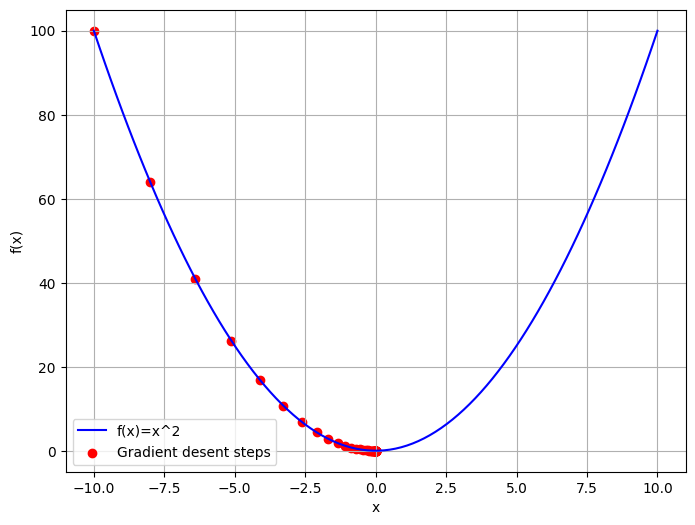

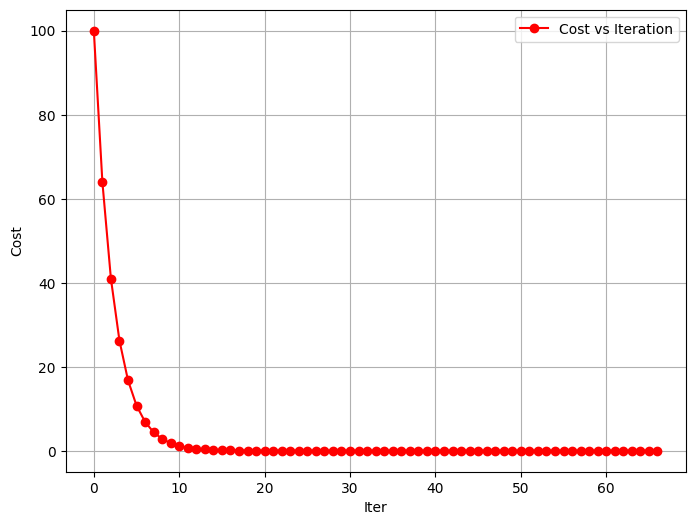

In [2]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')
f = x**2
f_prime = diff(f,x)
x_vals =[]
cost = []

def gradient_descent(x_s, learning_rate, iterations=100, stopping_cr = 1e-6,verbose=True):
    x_val=x_s
    
    for i in range(iterations):
        slope = f_prime.subs(x,x_val)
        step_size = learning_rate*slope
        x_new = x_val - step_size

        f_val = f.subs(x, x_val)
        cost.append(f_val)
        x_vals.append(x_val)

        if abs(x_new - x_val) < stopping_cr:
            break
        
        
        print(f"Iteration {i + 1}: x = {x_val}, Cost = {cost[i]}")
        x_val=x_new

gradient_descent(x_s=-10,learning_rate=0.1)

x_rng = np.linspace(-10,10,100)
y_rng = x_rng**2

plt.figure(figsize=(8,6))
plt.plot(x_rng, y_rng, label='f(x)=x^2', color='blue')
plt.scatter(x_vals, [x**2 for x in x_vals], color = 'red', marker='o', label ='Gradient desent steps')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(cost, color = 'red', marker = 'o', label= 'Cost vs Iteration')
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()


        

## Task 2: Gradient Descent in Higher Dimensions
1. Define a function like $$ f(x, y) = x^2 + y^2 $$.
2. Implement gradient descent for two variables.
3. Visualize the contour plot and the optimization path.
4. Experiment with different initialization points and learning rates.

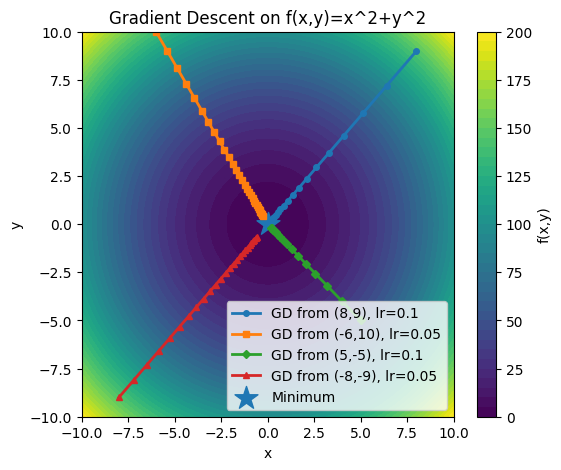

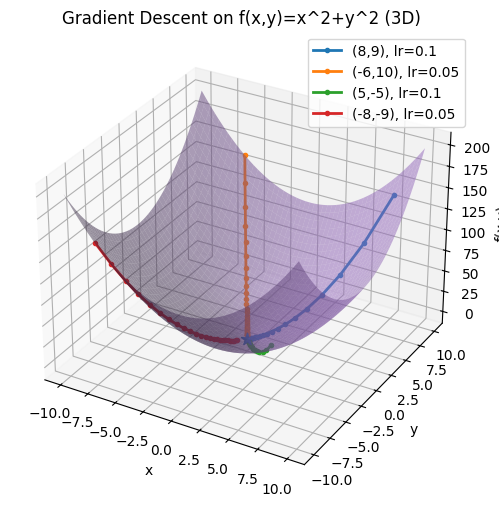

In [141]:
import sympy as sp
def gradient_descent_2D(x_s,y_s, learning_rate, iterations=100, stopping_cr = 1e-6):
    x, y = float(x_s), float(y_s)
    xs, ys = [x], [y]
    f = lambda x,y: x*x + y*y
    values = [(x, y, f(x, y))]
    for i in range(iterations):
        grad_x = 2*x
        grad_y = 2*y
        x_new = x - learning_rate * grad_x
        y_new = y - learning_rate * grad_y

        xs.append(x_new); ys.append(y_new)
        values.append((x_new,y_new,f(x_new, y_new)))
        if max(abs(grad_x), abs(grad_y))<stopping_cr:
            x, y = x_new, y_new
            break
        x, y = x_new, y_new
    return np.array(xs), np.array(ys)

experiments = [
    ( 8,  9, 0.10, 20),
    (-6,  10, 0.05, 30),
    ( 5, -5, 0.1, 15),
    (-8, -9, 0.05, 25),
]

f = lambda X, Y: X**2 + Y**2
xv = np.linspace(-10, 10, 400)
yv = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(xv, yv)
Z = f(X, Y)

colors  = ['red', 'o','black','blue']
markers = ['o', 's', 'D', '^']

plt.figure(figsize=(6,5))
cs = plt.contourf(X, Y, Z, levels=40)
plt.colorbar(cs, label='f(x,y)')

for i,(x0, y0, lr, steps) in enumerate(experiments):
    xs, ys= gradient_descent_2D(x0, y0, lr, steps)
    plt.plot(xs, ys, marker=markers[i % len(markers)], linewidth=2, markersize=4,label=f'GD from ({x0},{y0}), lr={lr}')

plt.scatter([0], [0], s=300, marker='*', label='Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on f(x,y)=x^2+y^2')
plt.legend()
plt.show()


#3D graph   
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')#using 3d space 

for (x0, y0, lr, steps) in experiments:
    xs, ys = gradient_descent_2D(x0, y0, lr, steps)
    zs = f(xs, ys)
    ax.plot(xs, ys, zs, linewidth=2, marker='o', markersize=3,label=f'({x0},{y0}), lr={lr}')
ax.plot_surface(X, Y, Z, alpha=0.5, linewidth=0)#alpha tanslusent %
ax.scatter(0, 0, 0, s=80, marker='*')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Gradient Descent on f(x,y)=x^2+y^2 (3D)')     
ax.legend()
plt.show()


## Task 3: Implement Stochastic Gradient Descent (SGD)
1. Generate a synthetic dataset : $$ y = 3x + 5 + \text{noise} $$.
2. Run gradient descent for linear regression.
3. Run stochastic gradient descent and compare results.
4. Plot the regression line and analyze the difference in convergence speed.

#### Stochastic Gradient Descent good for big data
#### Stochastic Gradient Descent diff from GD is it is do not use all of the values it uses only some random values 

theta0 for drad decent: [5.19992683], theta1 for drad decent:[2.95635418]
theta0 for stochastic drad decent: [5.06126845], theta1 for stochastic drad decent:[2.92469293]
SSR for gd 0.8066498899298423
SSR for sgd 0.8992281910237532


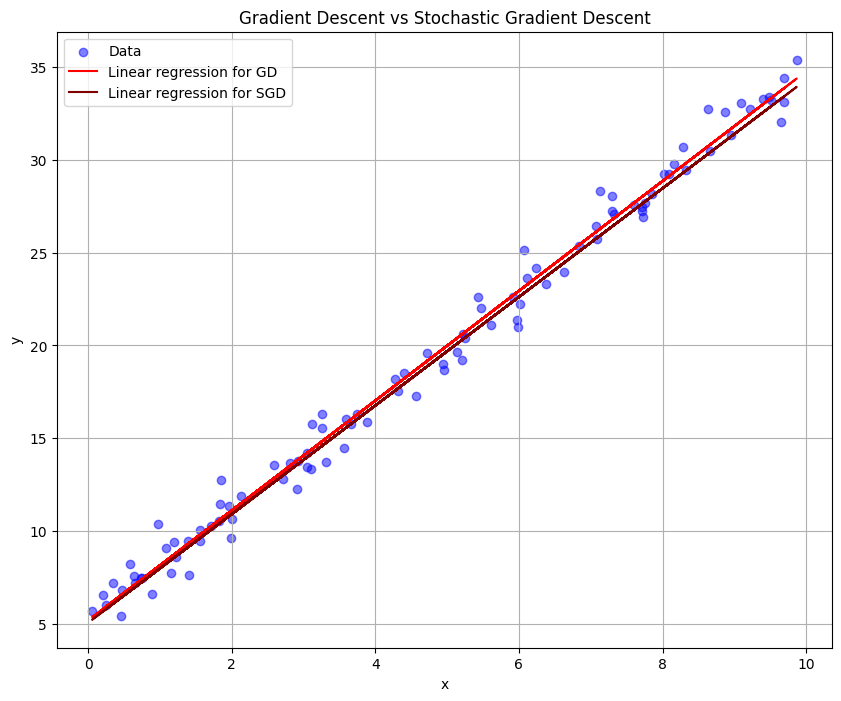

In [137]:
np.random.seed(42)
x = np.random.rand(100, 1)*10 #random values between 0 and 10, np.random.rand(100, 1) is 100 points with uniform distrubution 
#print(len(x))
y = 3 * x + 5 + np.random.randn(100, 1) 

X = np.c_[np.ones((100, 1)), x]# matrix X in the first column 1 for theta0 second is for theta1
"""print(X_b)
print('qq')
ver1 = X_b[3:3+1]
ver2=X_b[3]
print(ver1, ver2)
print(ver1.shape, ver2.shape)"""

def sgd(X,y,lr = 0.01, iterations=20):
    m,n = X.shape
    thetas = np.random.rand(n,1)
    for iter in range(iterations):
        for i in range(m):
            rand_index = np.random.randint(m)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]
            grad = 2*xi.T.dot(xi.dot(thetas)-yi)
            thetas = thetas - lr*grad

            """if np.max(np.abs(thetas_new-thetas))<1e-3:
                return thetas_new
            thetas=thetas_new"""
    return thetas

def gd(X,y,lr = 0.01, iterations=1000):
    m,n = X.shape
    thetas = np.random.rand(n,1)

    for iter in range(iterations):
        grad = (2/m) * X.T.dot(X.dot(thetas)-y)       
        thetas = thetas - lr*grad
        """if np.max(np.abs(thetas_new-thetas))<1e-3:
            return thetas_new
        thetas=thetas_new """
    return thetas

gd_theta = gd(X,y)
sgd_theta = sgd(X,y)

y_gd = X.dot(gd_theta)
y_sgd = X.dot(sgd_theta)

print(f'theta0 for drad decent: {gd_theta[0]}, theta1 for drad decent:{gd_theta[1]}')
print(f'theta0 for stochastic drad decent: {sgd_theta[0]}, theta1 for stochastic drad decent:{sgd_theta[1]}')

m,n=X.shape
ssr_gd = (1/m*(y_gd-y)**2).sum()
ssr_sgd = (1/m*(y_sgd-y)**2).sum()
print(f'SSR for gd {ssr_gd}' )
print(f'SSR for sgd {ssr_sgd}' )

plt.figure(figsize=(10,8))
plt.scatter(x, y, label='Data',color="blue", alpha=0.5)
plt.plot(x, y_gd, label='Linear regression for GD',color="red")
plt.plot(x, y_sgd, label='Linear regression for SGD',color="maroon")
plt.title("Gradient Descent vs Stochastic Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


### if we increase iteration when use GD SSR changes as iteration growth SSR decrease 
### if we increase iteration when use SGD SSR not quite changes. For sgd if iteration is smaller then better 

### Task 4
1. Define the multimodal function $$f(x, y) = (x^2 + y^2) * sin(x) * sin(y) + x^2 + y^2$$.
2. Visualize the 3D surface plot as well as the contour plot.
3. What could be a problem for convergence of the algorithm here ?
5. Run the gradient descent algorithm with different initial values and learning rates.
7. Add the optimization path to the contour plot for each initial value.
8. Compare the performance path of gradient descent and stochastic gradient descent for each initial value.



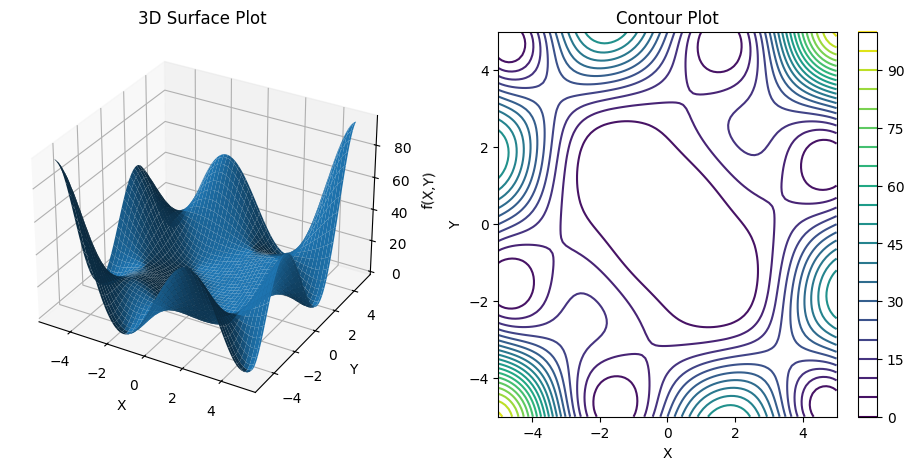

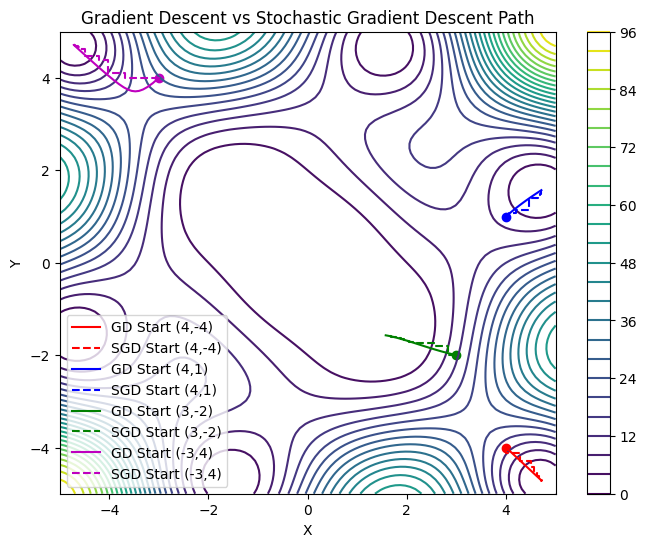

In [171]:
def f(x, y):
    return (x**2 + y**2) * np.sin(x) * np.sin(y) + x**2 + y**2

def gradient(x, y):
    df_dx = (2*x * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.cos(x) * np.sin(y)) + 2*x
    df_dy = (2*y * np.sin(x) * np.sin(y)) + ((x**2 + y**2) * np.sin(x) * np.cos(y)) + 2*y
    return np.array([df_dx, df_dy])

x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)
X,Y=np.meshgrid(x_values, y_values)
Z=f(X,Y)

fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121,projection='3d')
ax1.plot_surface(X,Y,Z)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(X,Y)')
ax1.set_title("3D Surface Plot")

ax2=fig.add_subplot(122)
level_c = ax2.contour(X,Y,Z,20)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Contour Plot")
plt.colorbar(level_c, ax=ax2)
plt.show()

def sgd3D(start,lr = 0.01, iterations=100):
    x,y = start
    path =[[x,y]]

    for i in range(iterations):
        grad = gradient(x,y)
        direc = np.random.randint(2)
        if direc==0:
            x = x-grad[0]*lr
        elif direc==1:
            y = y-grad[1]*lr
        path.append((x,y))
    return np.array(path)

def gd3D(start,lr = 0.01, iterations=100):
    x,y = start
    path =[[x,y]]
    for i in range(iterations):
        grad = gradient(x,y)
        x = x-grad[0]*lr 
        y = y-grad[1]*lr 
        path.append((x,y))
    return np.array(path)
    

initial_p=[(4,-4),(4,1),(3,-2),(-3,4)]

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contour(X, Y, Z, 25)
plt.colorbar(contour, ax=ax)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Gradient Descent vs Stochastic Gradient Descent Path")

colors = ['r', 'b', 'g','m']
for i, (x0, y0) in enumerate(initial_p):
    gd_path = gd3D((x0, y0))
    sgd_path = sgd3D((x0, y0))

    ax.plot(gd_path[:, 0], gd_path[:, 1], color=colors[i], label=f'GD Start ({x0},{y0})')
    ax.plot(sgd_path[:, 0], sgd_path[:, 1], '--', color=colors[i], label=f'SGD Start ({x0},{y0})')
    ax.scatter(x0, y0, color=colors[i], marker='o')

ax.legend()
plt.show()

## SKlearn regressions library

- Take one dataset we already used for previous weeks. 
- Prepare data to train a model
- Fit a linear regression with OLS method
- Fit a linear regression with gradient descent (look at sklearn documentation to do so)
- Compare and explain the results